## Highlighting your data

How do you show all of your data while making sure that viewers don't miss an important point or points? Here we discuss how to guide your viewer through the data with color-based highlights and text. We also introduce a dataset on common pollutant values across the United States.

### Hardcoding a highlight

You are working with the city of Houston to look at the relationship between sulfur dioxide ($SO_2$) and nitrogen dioxide ($NO_2$) pollution, specifically, pollution in the most recent year data was collected (2014). You have singled out a particularly bad day, November 26th, where there was a bad spike in the $SO_2$ levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

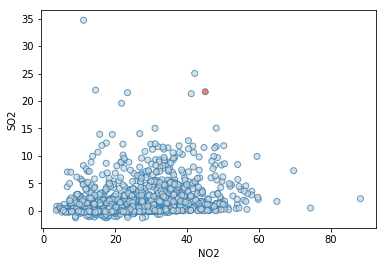

In [2]:
pollution = pd.read_csv('pollution_wide.csv')

houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

# Pass the houston_colors array to regplot() using the scatter_kws argument to color the points.
sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})


### Programmatically creating a highlight

You are continuing your work for the city of Houston. Now you want to look at the behavior of both $NO_2$ and $SO_2$2 when the un-plotted ozone ($O_3$) value was at its highest. 

To do this, replace the logic in the current list comprehension with one that compares a row's `O3` value with the highest observed $O_3$ in the dataset. Note: use `sns.scatterplot()` instead of `sns.regplot()`. This is because `sns.scatterplot()` can take a non-color vector as its `hue` argument and colors the points automatically while providing a helpful legend.

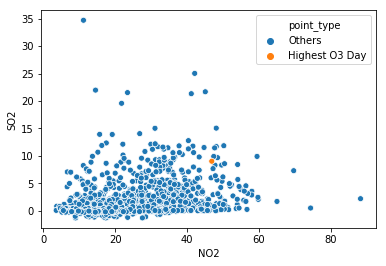

In [3]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Add a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if max_O3  == O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)


### Comparing with two KDEs

Imagine that you work for the premier air-filter provider. Your company has asked you to build a report that looks into why 2012 was a particularly good year for sales of your ozone ($O_3$) filter. You downloaded some helpful pollution data from the USGS, and you want to make a concise visualization that compares the general pattern of $O_3$ pollution for 2012 to all other years on record.

To do this, you can build two overlaid kernel density estimation plots (KDEs): one for `2012` $O_3$ data and one for all other years.

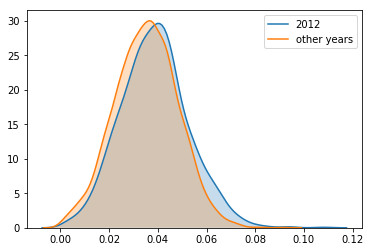

In [5]:
# Filter dataset to the year 2012
# Shade under the first KDE with the shade argument.
# Add the label '2012' for the plot legend.
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')


### Improving your KDEs

One way of enhancing KDEs is with the addition of a *rug* plot. Rug plots are little dashes drawn beneath the density that show precisely where each data point falls. Adding a rug plot is particularly useful when you don't have a ton of data.

With small amounts of data you often have gaps along your support with no data, and it can be hard to tell whether a non-zero KDE line means data was present or is due to a wide kernel. A rug plot helps address this.

Let's return to the `sns.distplot()` function to draw two KDEs: one looking at the data for Vandenberg Air Force Base and the other looking at all the other cities in the pollution data. Since there is much less data contributing to the shape of the Vandenberg plot, add a rug plot beneath it.

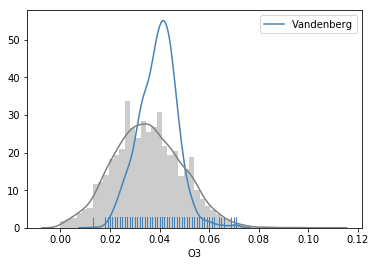

In [10]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn on histogram and color gray
             hist = True,  
             color = 'gray')


### Beeswarms

Build a beeswarm plot using `sns.swarmplot()` that looks at the Ozone levels for all the cities in the `pollution` data for the month of March. To make the beeswarm a bit more legible, decrease the point size to avoid the overcrowding caused by the many points drawn on the screen. Last, since you've done some manipulation of the data to make this plot, provide a title to help the reader orient with what they are viewing.

Text(0.5, 1.0, 'March Ozone levels by city')

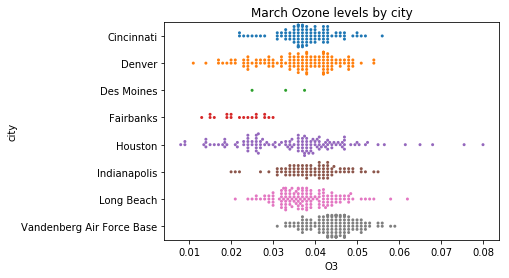

In [11]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to 3 to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')

### A basic text annotation

On the current scatter plot, you can see a particularly prominent point that contains the largest $SO_2$ value observed for August. This point is Cincinnati on August 11th, 2013; however, you would not be able to learn this information from the plot in its current form. Basic text annotations are great for pointing out interesting outliers and giving a bit more information. Draw the readers attention to this Cincinnati value by adding a basic text annotation that gives a bit of the background about this outlier.

Text(0.57, 41, 'Cincinnati had highest observed\nSO2 value on Aug 11, 2013')

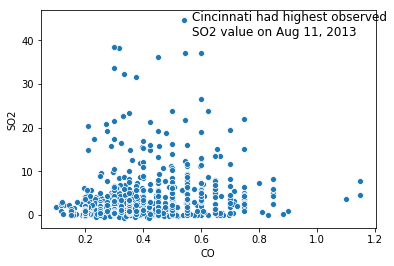

In [15]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(
         # Draw text annotation at x = 0.57 and y = 41 to call out the highest SO2 value.
         0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})


### Arrow annotations

Imagine you are a city planner for Long Beach, California. Long Beach is located on the Pacific Ocean and has a large firework show every New Year's Eve. You want to look into whether this show negatively impacts the air quality of the city. To do this, you will look at CO and NO2 levels on New Year's Day. However, it turns out that New Year's Day is not one of the outliers in the plot on the right, it's located in one of the more crowded areas.

To help guide the reader to this point, you'll use an annotation along with an arrow that points to the New Year's Day value. This will provide a nice annotation that explains what the viewer is looking while printing the text in a less crowded region of the plot.

Text(2, 15, 'Long Beach New Years')

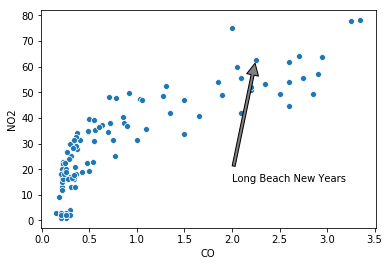

In [18]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             # Set the endpoint of the arrow (xy) by using the CO and NO2 column values from the lb_newyears DataFrame
             xy = (lb_newyears['CO'], lb_newyears['NO2']),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')

### Combining annotations and color

You believe that Long Beach, California has a smog problem. Using the pollution data, you'll attempt to make a point for increasing smog reduction regulations using your data visualization wizardry. Specifically, you want to focus on the relationship of CO to $O_3$ levels during 2014 at a city council meeting.

To emphasize how Long Beach compares to a set of peer cities, you've decided to highlight Long Beach and draw attention to a particularly bad day where the CO level was 1.6 and $O_3$ was `0.072` using an annotation.

In [ ]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3})
